# Movielens Dataset

#### importing required moduels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from datetime import datetime
%matplotlib inline

#### importing plotly offline

In [2]:
import plotly
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

##### extracting data into data frames

In [3]:
user_df = pd.read_csv('u.user', 
                 names = ['user id', 'age', 'gender', 'occupation', 'zip code'], sep = '|', header = None)
data_df = pd.read_csv('u.data', 
                  names = ['user id', 'movie id', 'rating', 'timestamp'], sep = '\t', header = None)
item_df = pd.read_csv('u.item', 
                 names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown',
                          'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 
                          'Drama', 'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci Fi',
                          'Thriller', 'War', 'Western'], sep = '|', header = None, encoding = "ISO-8859-1")

In [4]:
#user_df.head()

In [5]:
#data_df.head()

In [6]:
#item_df.head()

##### merging both data_df and user_df data frames

In [7]:
merge_data = pd.merge(data_df, user_df)

In [8]:
#merge_data.head()

#### Plotting Distribution of Age group among the users who gave ratings

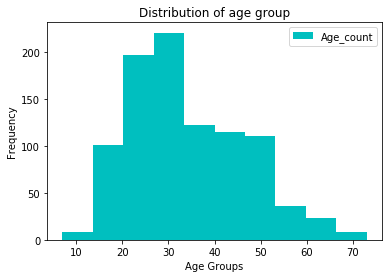

In [9]:
plt.hist(user_df.age, color='c', label="Age_count")
plt.title("Distribution of age group")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Plotting a histogram with overall ratings 

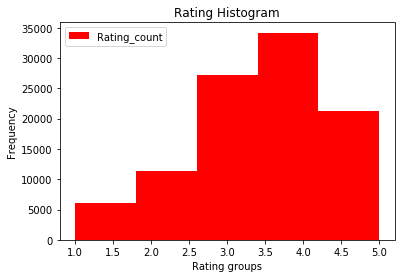

In [10]:
plt.hist(data_df.rating, color='r', label="Rating_count", bins = 5)

plt.title("Rating Histogram")
plt.xlabel("Rating groups")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Plotting average rating over the year
##### Extracting date from Unix Time to datetime

In [11]:
#data_df['year'] = pd.to_datetime(data_df['timestamp'],unit='s').dt.year

#data_df['month'] = pd.to_datetime(data_df['timestamp'],unit='s').dt.month

data_df['date'] = pd.to_datetime(data_df['timestamp'],unit='s').dt.date


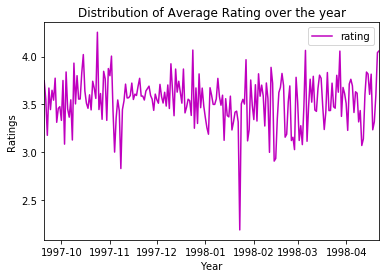

In [12]:
age_dist = pd.DataFrame(data_df.groupby('date').rating.mean())
age_dist.plot(color='m', title='Distribution of Average Rating over the year')
plt.ylabel("Ratings")
plt.xlabel("Year")

#### Plotting Stacked bar plot of average gender ratings over age group

In [13]:
data = merge_data.copy()
data.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


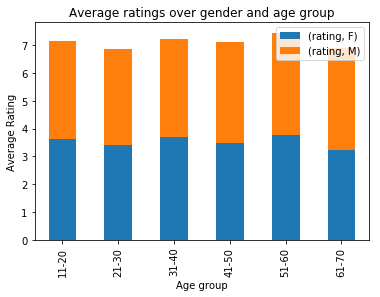

In [14]:
# grouping ages
data['status'] = pd.cut(data['age'], bins=[6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=False)
labels = np.array('7-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80 81-90 91-100'.split())
data['status'] = labels[data['status']]
data.reset_index(inplace=True)
#data_df

gen_rating_age = pd.DataFrame(data.groupby(['status','gender']).rating.mean(), index=None)
gen_rating_age = gen_rating_age.unstack().dropna().plot(kind='bar',stacked=True, label=("rating, gender"))
plt.legend()
plt.xlabel("Age group")
plt.ylabel("Average Rating")
plt.title("Average ratings over gender and age group")

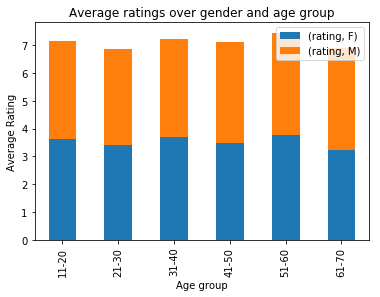

In [15]:
gen_rating_age = pd.DataFrame(data.groupby(['status','gender']).rating.mean(), index=None)
gen_rating_age = gen_rating_age.unstack().dropna().plot(kind='bar',stacked=True, label=("rating, gender"))
plt.legend()
plt.xlabel("Age group")
plt.ylabel("Average Rating")
plt.title("Average ratings over gender and age group")

#### Plotting Average rating vs. occupation

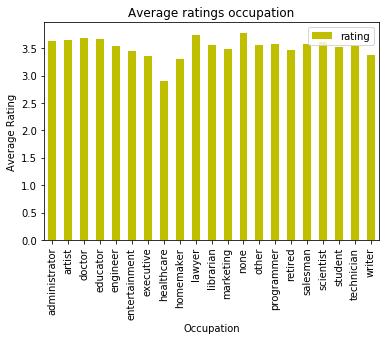

In [16]:
occ_rating = pd.DataFrame(merge_data.groupby(['occupation']).rating.mean(), index=None)
occ_rating.plot(kind='bar',color='y')
plt.legend()
plt.xlabel("Occupation")
plt.ylabel("Average Rating")
plt.title("Average ratings occupation")

## Using Plotly

#### Plotting Distribution of Age group among the users who gave ratings

In [17]:
data = [go.Histogram(x = user_df.age)]
layout = dict(xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Frequency'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Age histogram')

#### Plotting a histogram with overall ratings 

In [18]:
data = [go.Histogram(x = data_df.rating)]
layout = dict(xaxis = dict(title = 'Rating Groups'),
              yaxis = dict(title = 'Frequency'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Rating histogram')

#### Plotting average rating over the year

In [19]:
trace0 = Scatter(
        x = age_dist.index,
        y = age_dist.rating,
)

data = [trace0]
layout = dict(xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Average Rating'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Rating histogram')

#### Plotting Stacked bar plot of average gender ratings over age group

In [20]:
age_gender_rating = pd.DataFrame(merge_data.groupby(['age','gender']).rating.mean(), index=None)

In [21]:
a_g_r = age_gender_rating.copy()

In [22]:
a_g_r.reset_index(inplace = True)

In [23]:
a_g_r.head()

,age,gender,rating
0,7,M,3.767442
1,10,M,3.387097
2,11,M,2.925926
3,13,F,3.144928
4,13,M,3.523364


In [24]:
#gen_rating_age = gen_rating_age.unstack().dropna().plot(kind='bar',stacked=True, label=("rating, gender"))
trace0 = Bar(
        x = a_g_r.age,
        y = a_g_r.rating,
        
)

data = [trace0]
layout = dict(
          xaxis = dict(title = 'Age'),
          yaxis = dict(title = 'Average Rating'),
          barmode='stack'
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Average rating vs Age Group')

#### Plotting Average rating vs. occupation

In [25]:
trace0 = Bar(
        x = occ_rating.index,
        y = occ_rating.rating,
        
)
data = [trace0]
layout = dict(xaxis = dict(title = 'Occupation'),
              yaxis = dict(title = 'Average Rating'),
              barmode='group'
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Average rating vs occupation')

# Recommender Systems

In [26]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(merge_data, test_size=0.25)

/home/user/Desktop/Stack/work/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



### Memory Based CF 

In [27]:
train_data.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
86536,807,95,4,892529185,41,F,healthcare,93555
99779,936,1097,5,886833795,24,M,other,32789
36345,334,433,5,891628158,32,M,librarian,30002
31224,190,281,3,891042916,30,M,administrator,95938
4361,299,77,3,878192638,29,M,doctor,63108


In [28]:
n_users = merge_data['user id'].unique().shape[0]
n_items = merge_data['movie id'].unique().shape[0]
print("items = "+ str(n_items) + " users = " + str(n_users))

items = 1682 users = 943


In [29]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

In [30]:
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [31]:
train_data_matrix.shape

(943, 1682)

#### Calculating similarity matrix

In [32]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity
user_similarity = 1-pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = 1-pairwise_distances(train_data_matrix.T, metric='cosine')


In [33]:
print(user_similarity.shape)

(943, 943)


In [34]:
item_similarity

array([[ 1.        ,  0.26291759,  0.26688221, ...,  0.        ,
         0.05500653,  0.05500653],
       [ 0.26291759,  1.        ,  0.26724195, ...,  0.        ,
         0.09236236,  0.09236236],
       [ 0.26688221,  0.26724195,  1.        , ...,  0.        ,
         0.        ,  0.11371471],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.05500653,  0.09236236,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.05500653,  0.09236236,  0.11371471, ...,  0.        ,
         0.        ,  1.        ]])

##### Predction 

In [35]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [36]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [37]:
np.array([np.abs(user_similarity).sum(axis=1)]).T.shape

(943, 1)

In [38]:
item_prediction.shape

(943, 1682)

In [39]:
user_prediction.shape

(943, 1682)

In [40]:
train_data_matrix.shape

(943, 1682)

In [41]:
print(train_data_matrix.mean(axis=1).shape)

(943,)


In [42]:
a = np.array([8,16,24,8,4,12]).reshape(2,3)
a

array([[ 8, 16, 24],
       [ 8,  4, 12]])

In [43]:
b = np.array([a.mean(axis=1)]).T
b.shape
b

array([[ 16.],
       [  8.]])

In [44]:
c= np.array([8,16,24,8,4,12]).reshape(3,2)
c

array([[ 8, 16],
       [24,  8],
       [ 4, 12]])

In [45]:
a/b

array([[ 0.5,  1. ,  1.5],
       [ 1. ,  0.5,  1.5]])

In [46]:
d = np.array([1,16,3,4]).reshape(2,2)

In [47]:
e = np.array([8,16,9,24]).reshape(2,2)

In [48]:
d/e

array([[ 0.125     ,  1.        ],
       [ 0.33333333,  0.16666667]])

In [49]:
user_prediction.max()

3.2369581758306336

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [51]:
print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 2.9574940851818208
Item-based CF RMSE: 3.164236383146596


In [52]:
a = np.array([1,0,3,2]).reshape(2,2)

In [53]:
a[a.nonzero()].flatten()

array([1, 3, 2])

In [54]:
b = np.array([0,0,3,2]).reshape(2,2)

In [55]:
a[b.nonzero()].flatten()

array([3, 2])

In [56]:
b[a.nonzero()].flatten()

array([0, 3, 2])

In [57]:
train_data_matrix

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## -------------Model Based CF (SVD) ------------

In [58]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [59]:
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print ('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7109536817934217


In [60]:
import surprise

In [61]:
from surprise import KNNBasic

In [62]:
train_data.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
86536,807,95,4,892529185,41,F,healthcare,93555
99779,936,1097,5,886833795,24,M,other,32789
36345,334,433,5,891628158,32,M,librarian,30002
31224,190,281,3,891042916,30,M,administrator,95938
4361,299,77,3,878192638,29,M,doctor,63108


# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit([train_data['user id'], train_data['movie id']], train_data['rating'])

# predict the response
pred = knn.predict([train_data['user id'], train_data['movie id']])

# evaluate accuracy
print (accuracy_score(test_data['rating'].pred))


In [63]:
algo = KNNBasic()

In [64]:
trainset = train_data.iloc[:,[0,1,2]]

In [65]:
from surprise import KNNWithMeans
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise.accuracy import rmse

In [66]:
# Forming a Dataset with training and testing
data = Dataset.load_from_folds([('/home/user/Downloads/ml-100k/u1.base', '/home/user/Downloads/ml-100k/u1.test')], Reader('ml-100k'))

In [67]:
# Using Surprise Algorithm : KNNWithmeans()
algo_means = KNNWithMeans()   

In [68]:
# Predicting Value
for trainset, testset in data.folds(): 
    algo_means.train(trainset)                             
    predictions = algo_means.test(testset)
    rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9649


In [69]:
# PREDICTIONS into Dataframe 
df = pd.DataFrame(predictions, columns=['user_id', 'item_id', 'ratings_ui', 'estimated_Ratings', 'details'])    

In [70]:
# Adding a col Error in Dataframe
df['ERROR IN PREDICTION'] = abs(df.estimated_Ratings - df.ratings_ui)

In [71]:
df.shape

(20000, 6)

In [72]:
best_predictions = df[abs(df['ERROR IN PREDICTION']) == 0]
worst_predictions = df[abs(df['ERROR IN PREDICTION']) > 0]

In [73]:
best_predictions.shape

(168, 6)

In [74]:
worst_predictions.head()

,user_id,item_id,ratings_ui,estimated_Ratings,details,ERROR IN PREDICTION
0,1,6,5.0,3.684493,"{'was_impossible': False, 'actual_k': 20}",1.315507
1,1,10,3.0,3.830113,"{'was_impossible': False, 'actual_k': 40}",0.830113
2,1,12,5.0,4.413642,"{'was_impossible': False, 'actual_k': 40}",0.586358
3,1,14,5.0,4.156297,"{'was_impossible': False, 'actual_k': 40}",0.843703
4,1,17,3.0,3.504539,"{'was_impossible': False, 'actual_k': 40}",0.504539


<IPython.core.display.Javascript object>


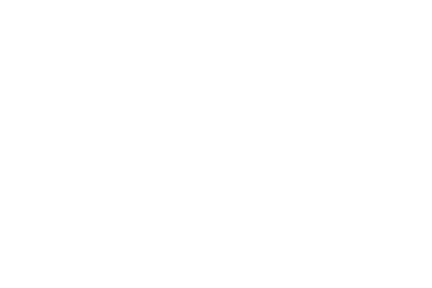

<IPython.core.display.Javascript object>


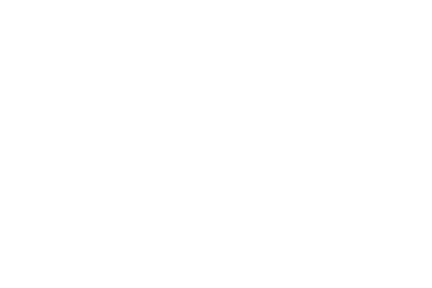

In [75]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')

In [76]:
from tsne import bh_sne

In [77]:
x_data = np.array(train_data['user id'])
y_data = np.array(train_data['movie id'])
z_data = np.array(train_data['rating'])

In [78]:
x_map = x_data
y_map = y_data
z_map = z_data

In [79]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [80]:
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

y_data = np.asarray(y_data).astype('float64')
y_data = y_data.reshape((y_data.shape[0], -1))

z_data = np.asarray(z_data).astype('float64')
z_data = z_data.reshape((z_data.shape[0], -1))

In [81]:
z_data

array([[ 4.],
       [ 5.],
       [ 5.],
       ..., 
       [ 4.],
       [ 4.],
       [ 4.]])

In [82]:
# perform t-SNE embedding
#vis_x = bh_sne(x_data)
#vis_y = bh_sne(y_data)
vis_z = bh_sne(z_data)

In [83]:
vis_z

array([[ 5.45197969, -1.48222236],
       [-8.65872301, -1.43405236],
       [-9.30975841, -0.24337555],
       ..., 
       [ 3.93827387, -1.44007635],
       [ 5.11476666, -0.85056858],
       [ 2.15996386, -1.68823508]])

In [84]:
%matplotlib inline

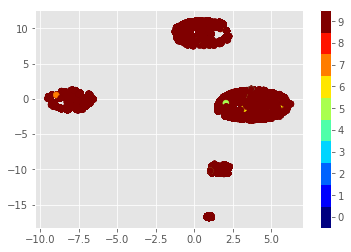

In [86]:
plt.scatter(vis_z[:,0], vis_z[:,1], c=x_data, cmap=plt.cm.get_cmap("jet", 10))
#plt.scatter(vis_x[:,0], vis_x[:,1], c=z_data, cmap=plt.cm.get_cmap("jet", 10))
#plt.scatter(vis_y[:,0], vis_y[:,1], c=x_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [98]:
#plt.scatter(vis_z[:,0], vis_z[:,1], c=x_data, cmap=plt.cm.get_cmap("jet", 10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
#plt.show()

In [88]:
#plt.scatter(vis_x[:,0], vis_x[:,1], c=y_data, cmap=plt.cm.get_cmap("jet", 10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
#plt.show()

In [89]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(x_map, y_map, z_map, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.show()

In [90]:
len(y_data.flatten())

75000

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

# For speed of computation, only run on a subset
n = 20000
x_data = x_data[:n]
y_data = y_data[:n]

# perform t-SNE embedding
vis_data = bh_sne(x_data)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

#### PCA

In [96]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

In [97]:
x_std = StandardScaler().fit_transform(train_data_matrix)
sklearn_PCA = sklearnPCA(n_components = 2)
y_sklearn = sklearn_PCA.fit_transform(x_std)